# Research Notebook
## your name here: Javier Humberto Arana Zelaya
## Date: Feb 16 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

Your text here

- I have solved the Tolman-Oppenheimer-Volkov equations in the one fluid dimensionless case for dark matter, and have obtained a variaty of stars with varying mass and radius that are represented with a mass radius curve, and it is correct in the dimensionless case. 

- I have also converted my dimensionless values to solar masses for mass and kilometers for radius

-I have also derived a formula using newtonian gravity to estimate the temperture of a hydrogen atom when it reaches the surfce of the dark star, and from the mass radius curve of different stars of diffferent pressures obtain for which mass radius value emites the highest temperture for a hydrogen atom. 

## Motivation:

Your text here

Solving the TOV equation in the dimensionless case is more straight forward in the code. I beleive I am getting the correct conversions from dimensionless to solar massses for the mass and km for the radius, so given this I moved froward to estimating the temperture of a hydrogen atom falling onto the compact dark star from infinity.

The motivation here I believe is that the hydrogen atom given it is heating up tremendously can emit signals of light via blackbody radiation (I beleieve that is the motivation for the temeprture but will clarify with the Professor). And if we use wiens law to approximate the type of light emission, one can fined what peak wavelength of light will be emitted at a given temperture.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Your text here

Here I will show my code for the solved TOV equation in the one fluid case for a boson mass of 1GeV. and I will show the code for converting the dimensionless solutions into solar masses for mass and km for radius. I have as well shown the fomrmula I derived for the temperture in the code howver I will show the derivation I made where the Professor guided me in one of the weekly meetings. Since in my first journal I included the dimensionless Tolman Oppenheimer Volkoff equations I still am using those 5 equations in my f funtion to obtain dimensionless mass and radius values for solutions obtained via solve ivp.


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

###Define Constants 

Rel = True 
mb=1 
n=4
e_o=mb**4

###Define EoS and TOV equations

def f(r,y,Rel=True) :

    p, m = y 
    
    if p<= 0: 
        return [0,0]
    
    if m == 0: 
        e_DM = 0
        dpdr = 0 

    else:    
        e_DM = e_o * (p / e_o) ** (2 / n) + ((2+n)/(n-2))*p
        if Rel: 
            dpdr = -(p + e_DM) * ((m + 4 * np.pi * r**3 * p) / (r * (r - 2 * m))) #from equation 
    
    e_DM = e_o * (p / e_o) ** (2 / n) + ((2+n)/(n-2))*p
    dmdr= 4*np.pi*(r**2)*e_DM
    dydt=[dpdr,dmdr]
    return dydt 
            

###creat stop condition when pressure equals zero 
def p0_equals_zero(r,y, Rel):
    p , _ = y 
    return p 

p0_equals_zero.terminal=True
p0_equals_zero.direction = -1


###Solve TOV equations 
p0_list = np.logspace(-5,0,100)
R_span = [1e-3,2]
r_list = [] #for storing r solutions 
p_list = [] #for storing p solutions 
m_list = [] #for storing m solutions 


for p0 in p0_list:
    IntCon = [p0, 0]  

    solutions = solve_ivp(f, R_span, IntCon, method='RK45', t_eval=np.linspace(R_span[0], R_span[1], 1000), args=(True,), events=p0_equals_zero, dense_output=True, rtol=1e-6, atol=1e-8)
    r= solutions.t  
    p=solutions.y[0]
    m= solutions.y[1]
    p_list.append(p)
    m_list.append(m[-1])
    r_list.append(r[-1])
    #plt.plot(r, m, color="black", linestyle="--")
    #plt.plot(r, p, color="black", linestyle="--")
  


###interpret results

###dimemnsionless array straight from the list solutions
r_list1=np.array(r_list)
m_list1=np.array(m_list)

###re scaled dimensionless solutions by a constant factor
r_list2=list(map(lambda x: x + 3.367, r_list))
m_list2=list(map(lambda x: x + 0.384, m_list))

###make list array
r_list3=np.array(r_list2)
m_list3=np.array(m_list2)

###extract max mass and corresponding radius from array

m_max=np.max(m_list3)
r_m_max=r_list3[74]   


print(np.max(m_list1))
print(r_list1[74])

print(m_max)
print(r_m_max)

###Define convertion functions

###from dimensionless to MeV for mass and MeV^-1 for radius 

M_p=1.220890e22 #in MeV the plank mass, from NIST constants
m_b=1000 #in MeV the mass of the boson for the dark star 

def mass_mev(m1):
    m_mev=m1*((M_p)**3/(m_b)**2)
    return m_mev

def radius_mev(r1):
    r_mev=r1*(M_p/(m_b)**2)
    return r_mev

m_MeV=mass_mev(m_list3) #mass in MeV
r_MeV=radius_mev(r_list3) #radius in MeV^-1


###now from MeV and MeV^-1 to solarmasses and km
m_conv=1.7827e-30 #conversion factor in units of kg/MeV, taken from NIST 1GeV(1000MeV) case 
r_conv=1.9733e-11 #conversion factor in units of cm/MeV^-1, taken from reccomended textbook of this term "compact stars" 
M_sun = 1.989e30 

def mass_solar(m):
    m_kg=m*m_conv
    m_solar=m_kg/M_sun
    return m_solar

def radius_km(r):
    r_cm=r*r_conv
    r_km1=r_cm * 1e-5
    return r_km1

###final masses in solar masses and radius is in km
m_solar_mass=mass_solar(m_MeV)
r_km=radius_km(r_MeV)

###converting dimensionless max mas to solar masses and coresponding radius to km
m_max_mev=mass_mev(m_max)
r_max_mass_mev=radius_mev(r_m_max)

m_max_solar_mass=mass_solar(m_max_mev)
r_max_mass_km=radius_km(r_max_mass_mev)

print(m_max_solar_mass)
print(r_max_mass_km)

###plot results 


plt.plot(r_list1, m_list1, color="black", linestyle="--")

plt.title('Mass vs Radius')
plt.xlabel('Radius (Dimensionless)')
plt.ylabel('Mass (Dimensionless)') 
plt.grid()
plt.show()

plt.plot(r_km, m_solar_mass, color="black", linestyle="--")

plt.title('Mass vs Radius')
plt.xlabel('Radius (Km)')
plt.ylabel('Mass ($M_{\odot}$)') 
plt.grid()
plt.show()

###convert km to m, and solar mass to kg, and name constant
def m(km):
    mm=km*1000
    return mm

def kg(sm):
    kgg=sm*M_sun
    return kgg

G=6.67430e-11        #in units of:(m^3 * kg^-1 * s^-2), from NIST
u1=1.66053906892e-27 #1 atomic mass unit from NIST in kg
mh=u1*1.00782503223  #atomic mass from NIST, mass of hydrogen in kg
kb=1.380649e-23      #in units of:(J*K^-1), from NIST


###The temperture of a hydrogen atom from infinity to the surface of the dark star
###It is from equaiting the potential energy to knetic via virial theorem, then use the knetic energy formula of ideal gas for one particle case
###Then solve for T:
def Temp(M,R):
    T=(G*M*mh)/(3*kb*R)
    return T

M_kg=kg(m_solar_mass)
r_m=m(r_km)

Temp_surface=Temp(M_kg,r_m)

###in kelvin 
print(Temp_surface) 

Temp_surface_max=np.max(Temp_surface)
Mass_max_temp_kg=M_kg[85]

Mass_max_temp_solar=Mass_max_temp_kg/M_sun

print("{:e}".format(Temp_surface_max))
print(Mass_max_temp_solar)
print(r_m[85]/1000)


plt.plot(Temp_surface, M_kg)

plt.title('Temperture vs Mass')
plt.xlabel('temp (K)')
plt.ylabel('mass (kg)') 
plt.show()

In the derivation of the formula for temperture of a single hydrogen atom  falling onto the surface of darkstar from infinity I first began with the newtonian gravitational potential due to a object with mass: $$U_g=-\frac{GMm_H}{R}$$ here M is the mass of the darkstar, m_H is the mass of the single hydrogen atom, and R is the radius of the dark star. From this now I need the gravitational potential from infinty to the surface of the darkstar: $$\Delta U_g=U_{g_R}-U_{g_\infty}=-\frac{GMm_H}{R}-(-\frac{GMm_H}{R+\infty})=-\frac{GMm_H}{R}-0=-\frac{GMm_H}{R}$$ now here is the potential that is needed. from here I move onto the usage of virial theorem, it states: $$\braket{K}=-\frac{1}{2} \braket{U}$$, where the average knetic energy is one half the negitive avg potential energy, here: $$\Delta U_g=\braket{U}$$. from this the average kinetic energy can be obtained: $$\braket{K}=-\frac{1}{2} \Delta U_g=-\frac{1}{2} (-\frac{GMm_H}{R})=\frac{GMm_H}{2R}$$. from this now I can now move on to using the average kinetic energy to find the temperture using the average kinetic energy formula of an ideal gas which is: $$\braket{K}=\frac{3}{2} k_b T \rightarrow \braket{K}=\frac{GMm_H}{2R}=\frac{3}{2} k_b T \rightarrow T=\frac{GMm_H}{3 k_b R}$$ Where $$k_b$$ is the boltzmann constant. 

# 3: So what? (What does it mean?)
## Describe your results

Your text here

This means that in figure 1.0 I am going to show it shows the variaty of diffrent stars with different masses with their corresponding radius the mass and radius was obtained when ivp solver would stop integrating when pressure is zero yeilding a star with a specific mass and radius depending on the intital condition of pressure. 

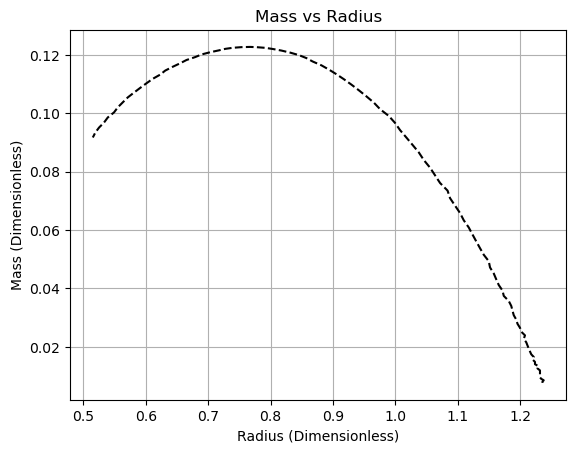
*Figure 1: Mass vs Radius Curve for Dimensionless Case.*

In figure 1.0 the maximum mass is 0.12272982720450845 for the mass and 0.7673833833833834 for the radius both in dimensionless units.
In figure 2.0 I now have converteted the dimensionless case into solar masses and km. 

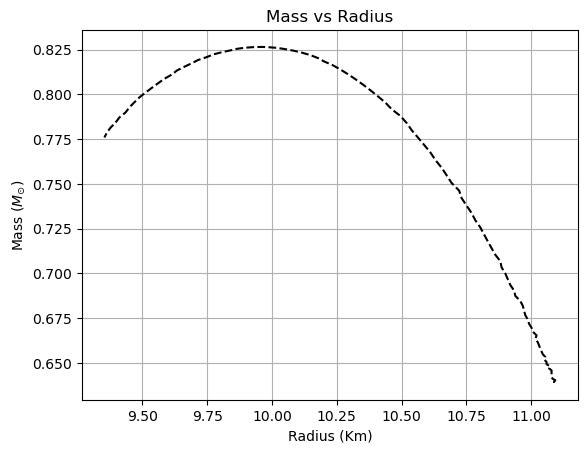
*Figure 2: Mass vs Radius Curve for Dimensionless Case.*

In figure 2.0 the maximum mass is 1.6176769350164303e+30 kg or 0.8265127539375368 solar masses and 9.96048300819521 km for the radius.
In figure 3.0 the graph shows temperture in Kelvin as a function of mass.

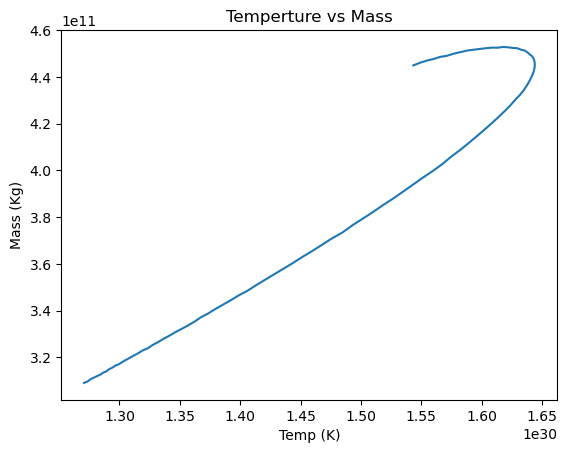

Here in figure 3.0 the maximum temperture that was obtained was a value of 4.528773e+11 K, With coresponding mass of 0.8133116817578836 solar masses and a radius of 9.632670235582712 km. 












# 4. Now what? (What's next?)
## Plan for the next week

Your text here

The goal for next week will be dependent on next weeks meeting, however I assume the next steps is to correct the newtonian estimation with general relativity, and then after that use the fact that hydrogen atom heats up it will emit light as a blackbody and I assume I would use wiens law of displacment to obtain a value for the peakwavelength of light at a given temperture. as well as of course solving the two fluid case of the TOV equations to obtain mass radius values for the two fluid case of the TOV equations. 

# 5. Bibliography

Your references here

[1] Sarah L. Pitz and J. Schaffner-Bielich, *Generating ultra compact boson stars with modified scalar potentials*, arXiv, 10 (2023), doi:10.1103/PhysRevD.108.103043

[2]  Norman K. Glendenning , *Compact Stars Nuclear Physics, Particle Physics and General Relativity second edition*, 440 (1996), Springer and A&A library.  